In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as stats

In [70]:
df = pd.read_csv("cancer_reg.csv", encoding = "ISO-8859-1")

In [71]:
df.head()

,ï»¿avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [72]:
df.dtypes

ï»¿avgAnnCount             float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [73]:
df = df.drop("Geography",axis=1)
df = df.drop("binnedInc",axis=1)

In [74]:
df.shape

(3047, 32)

In [75]:
df.describe()

,ï»¿avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿avgAnnCount           3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [77]:
df.isnull().sum()

ï»¿avgAnnCount                0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [78]:
df.drop('PctSomeCol18_24', axis=1, inplace=True)

In [79]:
df.shape

(3047, 31)

In [80]:
df['PctEmployed16_Over'].fillna(int(df['PctEmployed16_Over'].mean()), inplace=True)

In [81]:
df.isnull().sum()

ï»¿avgAnnCount               0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over           0
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [82]:
df['PctPrivateCoverageAlone'].fillna(int(df['PctPrivateCoverageAlone'].mean()), inplace=True)

In [83]:
df.isnull().sum()

ï»¿avgAnnCount             0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [84]:
df.rename(columns = {'ï»¿avgAnnCount':'avgAnnCount'}, inplace = True)

In [85]:
from scipy import stats
data=df['avgAnnCount'];
data

0       1397.000000
1        173.000000
2        102.000000
3        427.000000
4         57.000000
           ...     
3042    1962.667684
3043    1962.667684
3044    1962.667684
3045    1962.667684
3046    1962.667684
Name: avgAnnCount, Length: 3047, dtype: float64

In [86]:
#one-sample t-test
pvalue=stats.ttest_1samp(data,57)

In [87]:
pvalue

Ttest_1sampResult(statistic=21.409365866541442, pvalue=7.624012453889846e-95)

In [88]:
stats.ttest_1samp(data,1962.667684)

Ttest_1sampResult(statistic=-52.8602027421114, pvalue=0.0)

In [89]:
#Correlation
df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166630,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112192,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.325730,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.099073,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706707,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121366,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682434,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068837,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021604,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147864,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


<AxesSubplot:>

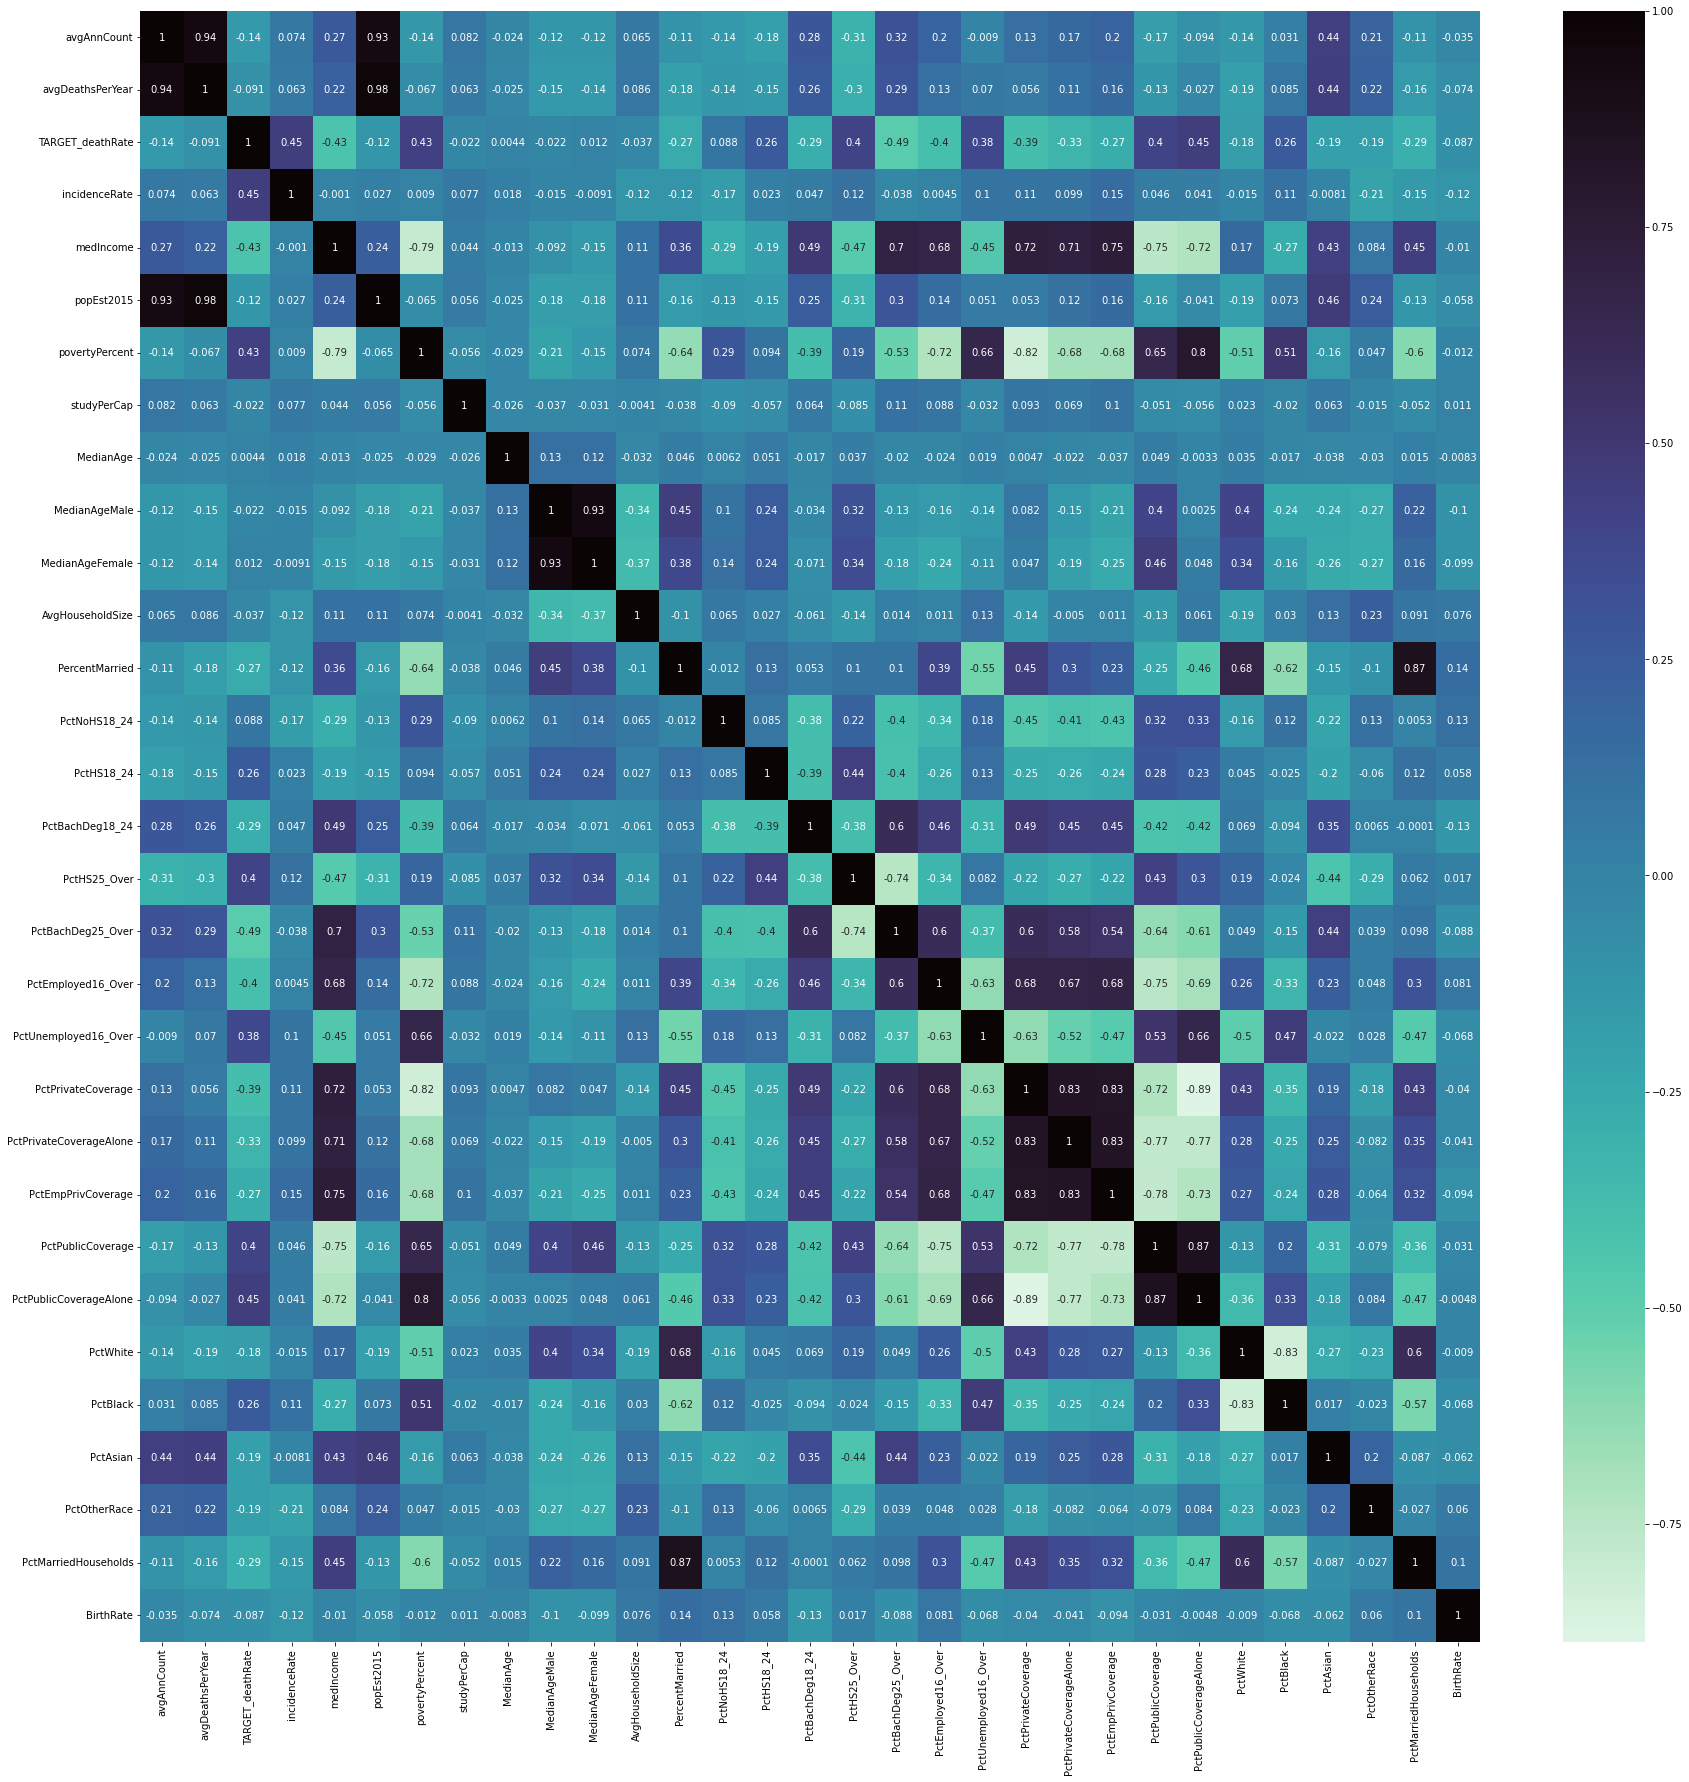

In [90]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='mako_r')

In [91]:
Age=df["MedianAge"]

In [92]:
Age

0       39.3
1       33.0
2       45.0
3       42.8
4       48.3
        ... 
3042    44.2
3043    30.4
3044    30.9
3045    39.0
3046    26.2
Name: MedianAge, Length: 3047, dtype: float64

In [93]:
Age_mean=np.mean(Age)
print(Age_mean)

45.272333442730634


In [94]:
df1=df.groupby(['MedianAgeMale'])['MedianAgeFemale'].sum().reset_index()

In [95]:
df1

,MedianAgeMale,MedianAgeFemale
0,22.4,22.3
1,22.8,25.2
2,23.0,24.5
3,23.7,40.2
4,23.8,22.3
...,...,...
293,56.5,56.7
294,58.5,55.0
295,58.6,55.0
296,60.2,58.2


In [96]:
df2=df1.head()
print(df2)

   MedianAgeMale  MedianAgeFemale
0           22.4             22.3
1           22.8             25.2
2           23.0             24.5
3           23.7             40.2
4           23.8             22.3


<AxesSubplot:xlabel='MedianAgeMale'>

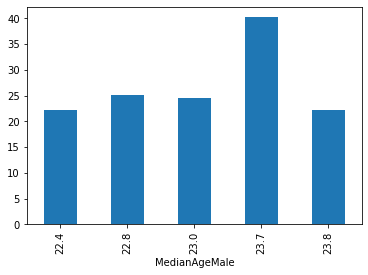

In [97]:
df2.groupby(['MedianAgeMale'])['MedianAgeFemale'].sum().plot.bar()

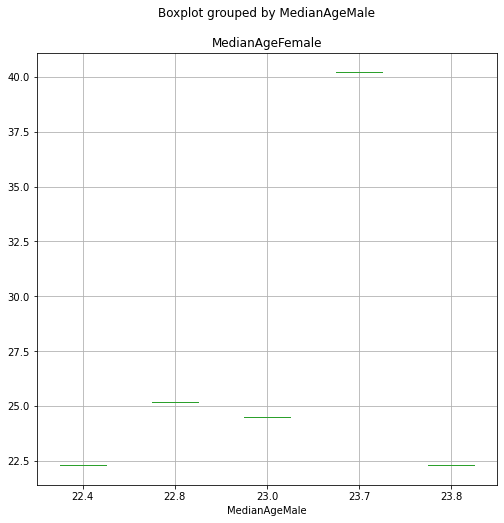

In [98]:
df2.boxplot(column="MedianAgeFemale",        
                 by= "MedianAgeMale",         
                 figsize= (8,8))
plt.show()

In [99]:
df3=df.groupby(['avgAnnCount'])['TARGET_deathRate'].sum().reset_index()

In [100]:
df3

,avgAnnCount,TARGET_deathRate
0,6.0,214.4
1,7.0,611.0
2,8.0,816.3
3,9.0,1245.6
4,10.0,1071.4
...,...,...
924,13294.0,157.1
925,14477.0,161.4
926,15470.0,146.6
927,24965.0,177.0


In [101]:
df4=df3.head()
print(df4)

   avgAnnCount  TARGET_deathRate
0          6.0             214.4
1          7.0             611.0
2          8.0             816.3
3          9.0            1245.6
4         10.0            1071.4


<AxesSubplot:xlabel='avgAnnCount'>

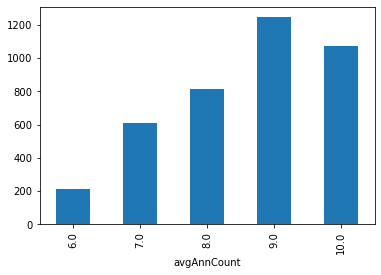

In [102]:
df4.groupby(['avgAnnCount'])['TARGET_deathRate'].sum().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


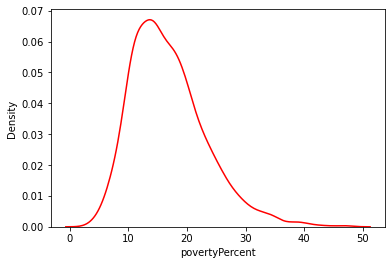

In [103]:
sns.distplot(df.povertyPercent, hist=False,kde=True,color='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


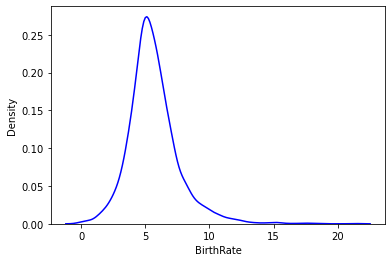

In [104]:
sns.distplot(df.BirthRate, hist=False,kde=True,color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


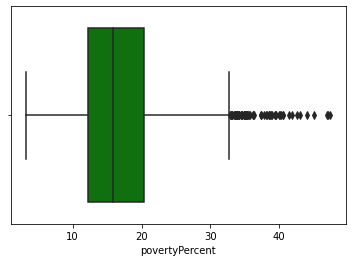

In [105]:
sns.boxplot(df.povertyPercent,color='g')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


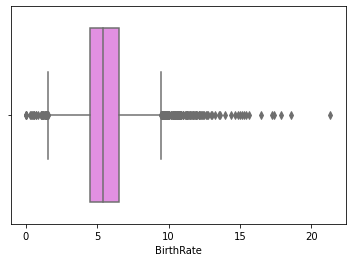

In [106]:
sns.boxplot(df.BirthRate ,color='violet')
plt.show()

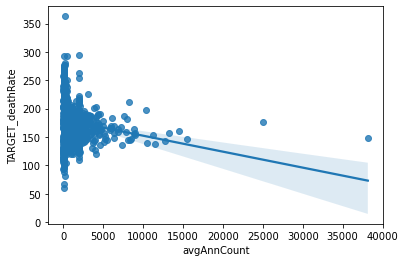

In [107]:
sns.regplot(x='avgAnnCount', y='TARGET_deathRate', data=df);

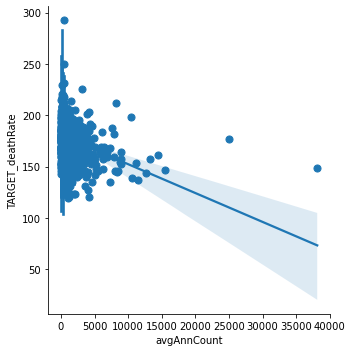

In [108]:
sns.lmplot(x='avgAnnCount', y='TARGET_deathRate', data=df, x_estimator=np.mean);

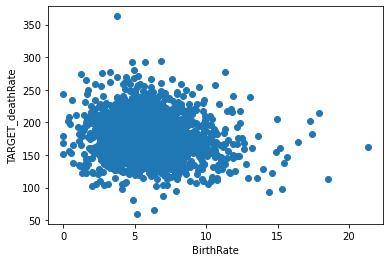

In [109]:
x1=df['BirthRate']
y1=df['TARGET_deathRate']
plt.xlabel('BirthRate',fontsize=10)
plt.ylabel('TARGET_deathRate',fontsize=10)
plt.scatter(x1,y1)
plt.show()

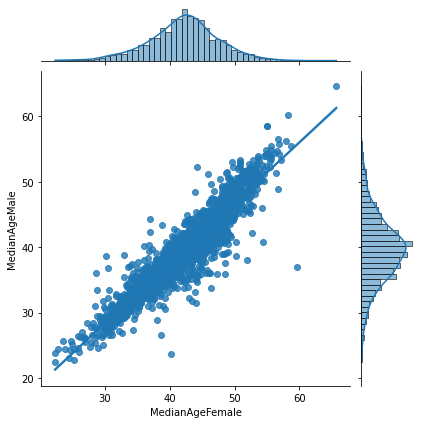

In [110]:
sns.jointplot(x='MedianAgeFemale',y='MedianAgeMale', data=df, kind="reg");

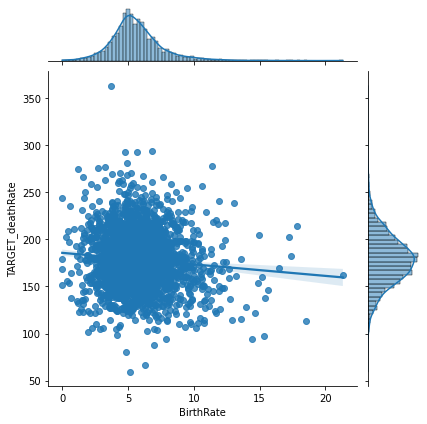

In [111]:
sns.jointplot(x='BirthRate', y='TARGET_deathRate', data=df, kind="reg");

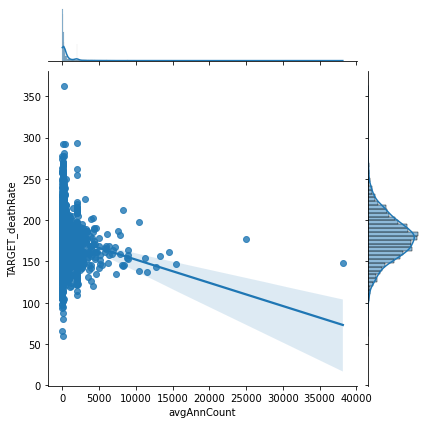

In [112]:
sns.jointplot(x='avgAnnCount', y='TARGET_deathRate', data=df, kind="reg");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


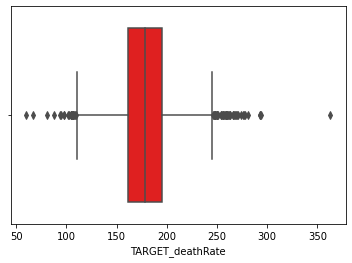

In [113]:
sns.boxplot(df.TARGET_deathRate,color='r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Density'>

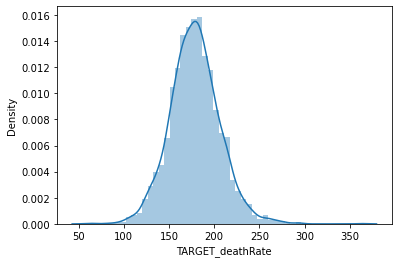

In [114]:
sns.distplot(df['TARGET_deathRate'])

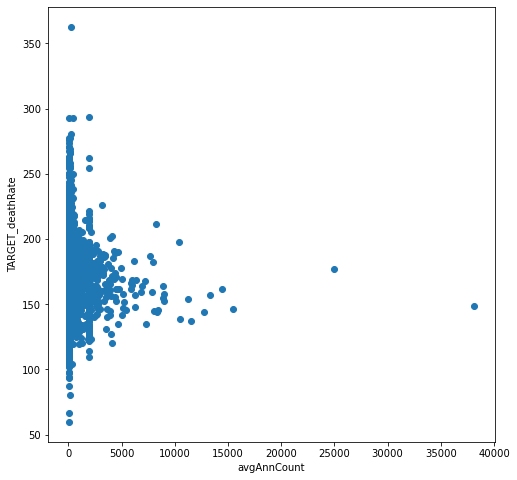

In [115]:
plt.figure(figsize=(8,8))
plt.xlabel('avgAnnCount')
plt.ylabel('TARGET_deathRate')
plt.scatter(x='avgAnnCount',y='TARGET_deathRate',data=df)
plt.show()

In [116]:
#Chi-square test
dataset_table=pd.crosstab(df['avgDeathsPerYear'],df['BirthRate'])
print(dataset_table)

BirthRate         0.000000   0.284091   0.363636   0.413223   0.476758   \
avgDeathsPerYear                                                          
3                         0          0          0          0          0   
4                         0          0          0          0          0   
5                         0          0          0          0          0   
6                         0          0          0          0          0   
7                         1          0          0          0          0   
...                     ...        ...        ...        ...        ...   
4895                      0          0          0          0          0   
5108                      0          0          0          0          0   
5780                      0          0          0          0          0   
9445                      0          0          0          0          0   
14010                     0          0          0          0          0   

BirthRate         0.5354

In [117]:
dataset_table.values

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
#Observed value
Observed_values=dataset_table.values
print("Observed values :-\n", Observed_values)

Observed values :-
 [[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
val=stats.chi2_contingency(dataset_table)

In [120]:
val

(1845896.7675531618,
 1.6607906948116016e-13,
 1831926,
 array([[0.00918937, 0.00229734, 0.00229734, ..., 0.00229734, 0.00229734,
         0.00229734],
        [0.03675747, 0.00918937, 0.00918937, ..., 0.00918937, 0.00918937,
         0.00918937],
        [0.0315064 , 0.0078766 , 0.0078766 , ..., 0.0078766 , 0.0078766 ,
         0.0078766 ],
        ...,
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819],
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819],
        [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
         0.00032819]]))

In [121]:
Expected_values=val[3]
Expected_values

array([[0.00918937, 0.00229734, 0.00229734, ..., 0.00229734, 0.00229734,
        0.00229734],
       [0.03675747, 0.00918937, 0.00918937, ..., 0.00918937, 0.00918937,
        0.00918937],
       [0.0315064 , 0.0078766 , 0.0078766 , ..., 0.0078766 , 0.0078766 ,
        0.0078766 ],
       ...,
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819],
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819],
       [0.00131277, 0.00032819, 0.00032819, ..., 0.00032819, 0.00032819,
        0.00032819]])

In [122]:
#Splitting of the data
from typing import ValuesView
x=df.iloc[:,np.r_[0:2,3:31]].values
y=df.iloc[:,2].values

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [124]:
df = df.reset_index()

In [125]:
df.fillna(0)

,index,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,...,48.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [126]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [127]:
regressor.fit(x_train, y_train)

LinearRegression()

In [128]:
y_pred=regressor.predict(x_test)

In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.163968927433118
Mean Squared Error: 347.99948322596975
Root Mean Squared Error: 18.6547442551746


In [130]:
# Finding the difference in Actual and Predicted value
pred_y = pd.DataFrame({'Actual Value':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted,Difference
0,140.0,153.272769,-13.272769
1,184.6,196.066862,-11.466862
2,193.6,201.575364,-7.975364
3,192.2,192.133681,0.066319
4,225.7,214.236222,11.463778
5,150.7,160.957947,-10.257947
6,151.5,178.146269,-26.646269
7,152.0,153.652058,-1.652058
8,197.9,203.683829,-5.783829
9,154.2,177.133951,-22.933951


Text(0.5, 1.0, 'Actual vs Predicted')

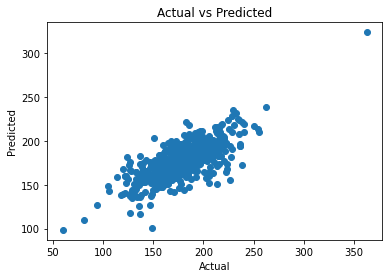

In [131]:
#Scatter Plot between Actual and Predicted value
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [132]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [133]:
y_pred = regressor.predict(x_test)

In [134]:
# Evaluate the model 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.428754098360654
Mean Squared Error: 380.50026524590163
Root Mean Squared Error: 19.50641600207228


In [135]:
# Finding the difference in Actual and Predicted value
pred_y = pd.DataFrame({'Actual Value':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted,Difference
0,140.0,154.51,-14.51
1,184.6,190.48,-5.88
2,193.6,198.47,-4.87
3,192.2,185.70,6.50
4,225.7,205.38,20.32
5,150.7,144.97,5.73
6,151.5,179.61,-28.11
7,152.0,149.98,2.02
8,197.9,197.09,0.81
9,154.2,168.98,-14.78


Text(0.5, 1.0, 'Actual vs Predicted')

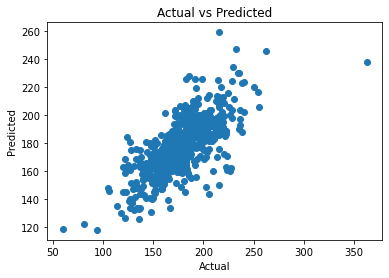

In [136]:
#Scatter Plot between Actual and Predicted value
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [137]:
#XGBoost Algorithm
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [138]:
#XGBoost Algo
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(x_train, y_train)
 
# Predict the model
y_pred = xgb_r.predict(x_test)

[03:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.49573294824358105

In [141]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.470239062700117
Mean Squared Error: 397.8537086936502
Root Mean Squared Error: 19.946270545985538


In [142]:
# Finding the difference in Actual and Predicted value
pred_y = pd.DataFrame({'Actual Value':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_y[0:20]

,Actual Value,Predicted,Difference
0,140.0,147.344070,-7.344070
1,184.6,192.166595,-7.566595
2,193.6,200.258194,-6.658194
3,192.2,174.889893,17.310107
4,225.7,214.689774,11.010226
5,150.7,155.150528,-4.450528
6,151.5,175.141373,-23.641373
7,152.0,155.206924,-3.206924
8,197.9,178.674286,19.225714
9,154.2,169.939346,-15.739346


Text(0.5, 1.0, 'Actual vs Predicted')

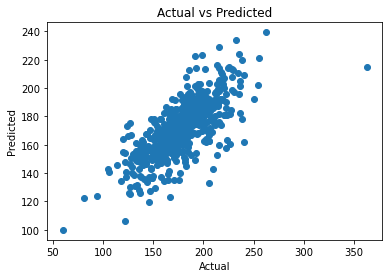

In [143]:
#Scatter Plot between Actual and Predicted value
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [144]:
#Pearson's Correlation test
from scipy.stats import pearsonr
list1 = df['BirthRate']
list2 = df['avgDeathsPerYear']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.074


In [145]:
from scipy.stats import pearsonr
list1 = df['avgAnnCount']
list2 = df['avgDeathsPerYear']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.939
